# Projeto de Redes Sociais

Cicero Tiago Carneiro Valentim

Lais Nascimento da Silva

Thalia Loiola da Silva

William Augusto Reis da Silva

### Bibliotecas

In [3]:
from graph_tool import centrality, clustering, PropertyMap
from graph_tool import Graph
# from graph_tool.all import graph_draw
from netpixi.data.gt import *
from netpixi import render, peek
import netpixi
import pandas as pd
import netpixi
import numpy as np

In [5]:
!pip install openpyxl

     |████████████████████████████████| 242 kB 732 kB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [6]:
df = pd.read_excel('netflix.xlsx')
df = df.dropna(subset=['Genre'])
df = df.reset_index()
df

,index,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,https://www.youtube.com/watch?v=LqB6XJix-dM,YouTube
1,1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,2,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,Mez Tharatorn,...,2021-03-03,NaN,https://www.netflix.com/watch/81306155,https://www.imdb.com/title/tt13393728,After her ex-boyfriend cons her out of a large...,131.0,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BODAzOG...,https://www.youtube.com/watch?v=md3CmFLGK6Y,YouTube
3,3,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,NaN,...,2021-03-03,NaN,https://www.netflix.com/watch/81307527,https://www.imdb.com/title/tt2300049,A group of social welfare workers led by their...,47.0,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BMTc0Nz...,https://www.youtube.com/watch?v=5kyF2vy63r0,YouTube
4,4,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,Movie,8.3,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf Sjöberg,...,2021-03-03,NaN,https://www.netflix.com/watch/81382068,https://www.imdb.com/title/tt0041155,An unhappily married farm worker struggling to...,88.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BMjVmMz...,https://www.youtube.com/watch?v=H0itWKFwMpQ,YouTube
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9395,9420,13 Going on 30,"Comedy, Fantasy, Romance","Romantic Comedies,Comedies,Romantic Films,Roma...","English, Portuguese",Movie,3.1,"Hungary,Lithuania,Romania,United Kingdom,Belgi...",1-2 hour,Gary Winick,...,2015-04-14,"Revolution Studios, Thirteen Productions LLC",https://www.netflix.com/watch/60034573,https://www.imdb.com/title/tt0337563,When a geeky teens birthday party goes awry an...,167842.0,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...,https://images-na.ssl-images-amazon.com/images...,https://www.youtube.com/watch?v=SApIKVq1iJQ,YouTube
9396,9421,LIFE 2.0,Documentary,"Social & Cultural Documentaries,Biographical D...",English,Movie,8.2,"Hungary,Lithuania,India,Australia,United Kingd...",1-2 hour,Jason Spingarn-Koff,...,2015-04-14,NaN,https://www.netflix.com/watch/70129457,https://www.imdb.com/title/tt1518809,Computer users across the globe log onto the v...,878.0,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...,https://images-na.ssl-images-amazon.com/images...,https://www.youtube.com/watch?v=2TY-O5Dc8oA,YouTube
9397,9422,Brand New Day,"Documentary, Music","Australian Comedies,Romantic Comedies,Australi...",English,Movie,8.6,Australia,1-2 hour,Amos Gitai,...,2015-04-14,NaN,https://www.netflix.com/watch/70125340,NaN,In an idyllic port town on Australias west coa...,14.0,http://cdn1.nflximg.net/images/5543/12045543.jpg,NaN,https://www.youtu

In [7]:
## SEPARANDO EM FILMES E SERIES:

# FILMES
df_filmes = df.copy(deep=True)

for i in range(df_filmes.shape[0]):
    if df_filmes["Series or Movie"].loc[i]!= "Movie":
        df_filmes = df_filmes.drop([i]) 
        
df_filmes.head()  

,index,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
1,1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,2,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,Mez Tharatorn,...,2021-03-03,NaN,https://www.netflix.com/watch/81306155,https://www.imdb.com/title/tt13393728,After her ex-boyfriend cons her out of a large...,131.0,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BODAzOG...,https://www.youtube.com/watch?v=md3CmFLGK6Y,YouTube
4,4,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,Movie,8.3,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf Sjöberg,...,2021-03-03,NaN,https://www.netflix.com/watch/81382068,https://www.imdb.com/title/tt0041155,An unhappily married farm worker struggling to...,88.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BMjVmMz...,https://www.youtube.com/watch?v=H0itWKFwMpQ,YouTube
5,5,Snowroller,Comedy,"Sports Movies,Sports Comedies,Comedies,Swedish...","Swedish, English, German, Norwegian",Movie,5.3,"Lithuania,Poland,France,Italy,Spain,Greece,Cze...",1-2 hour,Lasse Åberg,...,2021-03-03,NaN,https://www.netflix.com/watch/81382187,https://www.imdb.com/title/tt0090115,"Two friends take a ski trip to the Alps, where...",5926.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BZDY2NG...,https://www.youtube.com/watch?v=tjWouBLwe3c,YouTube
6,6,The Invisible,"Crime, Drama, Fantasy, Mystery, Thriller","Thriller Movies,Movies Based on Books,Supernat...",English,Movie,2.0,"Lithuania,Poland,France,Italy,Spain,Greece,Cze...",1-2 hour,David S. Goyer,...,2021-03-03,"Touchstone Pictures, Spyglass Entertainment",https://www.netflix.com/watch/81382078,https://www.imdb.com/title/tt0435670,"Critically injured after a brutal beating, a t...",34738.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BNjQ3Mj...,https://www.youtube.com/watch?v=yDB3Ha3vxyc,YouTube


In [9]:
# SERIES
df_series = df.copy(deep=True)

for i in range(df_series.shape[0]):
    if df_series["Series or Movie"].loc[i]!= "Series":
        df_series = df_series.drop([i]) 
        
df_series.head() 

,index,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,https://www.youtube.com/watch?v=LqB6XJix-dM,YouTube
3,3,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,NaN,...,2021-03-03,NaN,https://www.netflix.com/watch/81307527,https://www.imdb.com/title/tt2300049,A group of social welfare workers led by their...,47.0,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BMTc0Nz...,https://www.youtube.com/watch?v=5kyF2vy63r0,YouTube
13,13,Girls und Panzer das Finale,"Animation, Action, Comedy","Drama Anime,Action & Adventure,Action Anime,An...",Japanese,Series,8.5,Japan,< 30 minutes,Tsutomu Mizushima,...,2021-03-02,NaN,https://www.netflix.com/watch/81418299,https://www.imdb.com/title/tt7833606,The girls on Oarai’s tankery team look forward...,210.0,https://occ-0-993-988.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOGU2OG...,https://www.youtube.com/watch?v=V5DNE24fHo8,YouTube
14,14,The Coroner,"Crime, Drama","Mystery Programmes,Drama Programmes,Crime TV D...",English,Series,7.8,Canada,< 30 minutes,NaN,...,2021-03-02,NaN,https://www.netflix.com/watch/81006773,https://www.imdb.com/title/tt5194866,"Months after a personal tragedy, a doctor take...",1328.0,https://occ-0-293-999.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BMzk4Mz...,https://www.youtube.com/watch?v=NrbcI2DcupM,YouTube
15,15,Brave New World,"Drama, Sci-Fi","TV Dramas,US TV Shows,TV Shows Based on Books,...",English,Series,3.8,"Poland,Czech Republic,Hungary,Slovakia,Romania...",< 30 minutes,NaN,...,2021-03-02,NaN,https://www.netflix.com/watch/80991826,https://www.imdb.com/title/tt9814116,When a rebellious stranger arrives from anothe...,9408.0,https://occ-0-4815-1432.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BMjk4MT...,https://www.youtube.com/watch?v=As2sMgm0Szo,YouTube


In [27]:
lista_filmes=df_filmes["Title"].tolist()
lista_series=df_series["Title"].tolist()

In [34]:
grafo_completo = load_gt('projeto-one-mode-dicotomizado.net.gz')

# Filmes

In [42]:
# Criando o Grafo
grafo_filme = Graph(directed = False)
grafo_filme = grafo_completo
for v in grafo_filme.vertices():
    if grafo_filme.vp['nome'][v] not in lista_filmes:
        print(v)
        grafo_filme.remove_vertex(v)
        

In [49]:
save_gt(grafo_filme, 'projeto-Grafo_Filmes.net.gz')

In [43]:
# calculo clustering coefficient
c = clustering.local_clustering(grafo_filme)

# calculo betweenness
bc, _ = centrality.betweenness(grafo_filme)

# calculo degree
dc = degree_gt(grafo_filme)

grafo_filme.vp['betweenness'] = bc
grafo_filme.vp['clustering'] = c
grafo_filme.vp['degree'] = dc

In [45]:
df = pd.DataFrame({k: list(v) for k, v in grafo_filme.vp.items()})

In [46]:
df

,id,nome,_x,_y,betweenness,clustering,degree
0,1,HOW TO BUILD A GIRL,-229.729180,1039.631642,0.000000,0.000000,0.000000
1,2,The Con-Heartist,854.216640,357.749654,0.000000,0.000000,0.000000
2,4,Only a Mother,698.456925,1632.287651,0.000000,0.000000,0.000000
3,5,Snowroller,807.543769,1008.637190,0.000000,0.000000,0.000000
4,6,The Invisible,55.645344,122.529907,0.000067,0.664093,0.021584
...,...,...,...,...,...,...,...
6853,9135,District 13: Ultimatum,-1202.132458,-859.888154,0.000000,0.000000,0.000000
6854,9136,13 Going on 30,837.615451,675.264901,0.000000,0.000000,0.000000
6855,9137,LIFE 2.0,1084.806275,-34.898042,0.000000,0.000000,0.000000
6856,9138,Brand New Day,405.029912,-1525.691346,0.000000,0.000000,0.000000


In [50]:
# filmes_score = filmes[['IMDb Score', 'Title']].rename(columns={"Title":"nome"})
filmes_score = df_filmes[['Rotten Tomatoes Score', 'Title']].rename(columns={"Title":"nome"})

filmes_score.nome = filmes_score.nome.astype(str, copy=False)
df.nome = df.nome.astype(str, copy=False)
df.id = df.id.astype(int, copy=False)

filmes_score = filmes_score.drop_duplicates(subset=['nome'], keep=False)

filmes_score = filmes_score.dropna()
filmes_score.head()



,Rotten Tomatoes Score,nome
1,79.0,HOW TO BUILD A GIRL
6,20.0,The Invisible
7,92.0,The Simple Minded Murderer
10,52.0,I
11,96.0,Harrys Daughters


In [51]:
df = df.set_index('nome').join(filmes_score.set_index('nome'), how='left').reset_index()

In [52]:
# nova métrica: reputação
df = df.rename(columns={"Rotten Tomatoes Score": 'reputacao'})

In [53]:
df = df.dropna() 

In [54]:
df.head(4)

,nome,id,_x,_y,betweenness,clustering,degree,reputacao
0,HOW TO BUILD A GIRL,1,-229.729180,1039.631642,0.000000,0.000000,0.000000,79.0
4,The Invisible,6,55.645344,122.529907,0.000067,0.664093,0.021584,20.0
5,The Simple Minded Murderer,7,-1144.111152,-437.080844,0.000000,0.000000,0.000000,92.0
8,I,10,81.874520,73.708312,0.000000,1.000000,0.010938,52.0


In [55]:
import seaborn as sns
sns.set()

In [56]:
import statsmodels.formula.api as smf

In [57]:
# pegamos apenas os betweenness com valores > 0 
df_positivos = df[df['betweenness'] > 0]
df_positivos.head(4)

,nome,id,_x,_y,betweenness,clustering,degree,reputacao
4,The Invisible,6,55.645344,122.529907,0.000067,0.664093,0.021584,20.0
53,Ride Your Wave,62,44.678612,36.371525,0.000555,0.490624,0.034417,93.0
75,The Shadow,89,67.704799,97.362622,0.000039,0.428939,0.019980,35.0
78,Awara Paagal Deewana,93,65.344360,120.645456,0.000129,0.532766,0.035292,54.0


<AxesSubplot:xlabel='betweenness', ylabel='reputacao'>

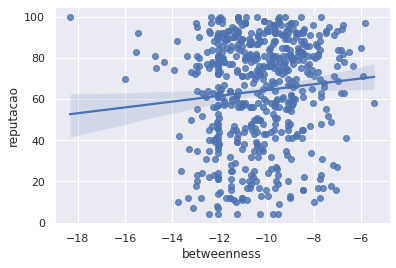

In [58]:
sns.regplot(x=np.log(df_positivos['betweenness']), y=df_positivos['reputacao'])

In [59]:
model = smf.ols(data=df_positivos, formula='reputacao ~ np.log(betweenness)')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              reputacao   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     5.073
Date:                Tue, 16 Nov 2021   Prob (F-statistic):             0.0247
Time:                        15:51:20   Log-Likelihood:                -2645.9
No. Observations:                 567   AIC:                             5296.
Df Residuals:                     565   BIC:                             5304.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              78.4474      6.533     12.007      0.000      65.615      91.280
np.log(betweenness)     1.4050      0.624      2.252      0.025       0.180       2.630
==============================================================================
Omnibus:                       55.503   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.607
Skew:                          -0.585   Prob(JB):                     3.40e-10
Kurtosis:                       2.308   Cond. No.                         63.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Séries

In [ ]:
# Criando o Grafo
grafo_series = Graph(directed = False)
grafo_series = grafo_completo
for v in grafo_series.vertices():
    if grafo_series.vp['nome'][v] not in lista_series:
        print(v)
        grafo_series.remove_vertex(v)

In [61]:
save_gt(grafo_series, 'projeto-Grafo_Series.net.gz')

In [62]:
# calculo clustering coefficient
c = clustering.local_clustering(grafo_series)

# calculo betweenness
bc, _ = centrality.betweenness(grafo_series)

# calculo degree
dc = degree_gt(grafo_series)

grafo_series.vp['betweenness'] = bc
grafo_series.vp['clustering'] = c
grafo_series.vp['degree'] = dc

In [63]:
df = pd.DataFrame({k: list(v) for k, v in grafo_series.vp.items()})

In [64]:
df

,id,nome,_x,_y,betweenness,clustering,degree
0,2,The Con-Heartist,854.216640,357.749654,0.0,0.0,0.000000
1,5,Snowroller,807.543769,1008.637190,0.0,0.0,0.000000
2,7,The Simple Minded Murderer,-1144.111152,-437.080844,0.0,0.0,0.000000
3,9,Joker,-723.304606,1483.995708,0.0,0.0,0.000000
4,11,Harrys Daughters,96.413293,74.948004,0.0,0.0,0.000289
...,...,...,...,...,...,...,...
3453,9130,One Chance,-110.823683,-30.648771,0.0,0.0,0.000289
3454,9132,One for the Money,94.878740,120.661904,0.0,1.0,0.006942
3455,9135,District 13: Ultimatum,-1202.132458,-859.888154,0.0,0.0,0.000000
3456,9137,LIFE 2.0,1084.806275,-34.898042,0.0,0.0,0.000000


In [65]:
series_score = df_series[['Rotten Tomatoes Score', 'Title']].rename(columns={"Title":"nome"})

series_score.nome = series_score.nome.astype(str, copy=False)
df.nome = df.nome.astype(str, copy=False)
df.id = df.id.astype(int, copy=False)

series_score = series_score.drop_duplicates(subset=['nome'], keep=False)

series_score = series_score.dropna()
series_score.head()



,Rotten Tomatoes Score,nome
0,98.0,Lets Fight Ghost
36,75.0,Alice
126,78.0,Dont be the First one
162,66.0,Ace Attorney
175,82.0,Lara


In [66]:
df = df.set_index('nome').join(series_score.set_index('nome'), how='left').reset_index()
# nova métrica: reputação
df = df.rename(columns={"Rotten Tomatoes Score": 'reputacao'})
df = df.dropna() 
df.head(4)

,nome,id,_x,_y,betweenness,clustering,degree,reputacao
69,Alone,166,-992.102381,-893.824030,0.000000,0.000000,0.000000,61.0
98,My Girl,250,2.651933,10.823139,0.000000,1.000000,0.002314,53.0
128,Astro Boy,325,84.847303,48.175259,0.000003,0.864895,0.012439,50.0
157,Heroes,405,18.190440,79.057965,0.000000,1.000000,0.002603,71.0


In [67]:
df_positivos = df[df['betweenness'] > 0]
df_positivos.head(4)

,nome,id,_x,_y,betweenness,clustering,degree,reputacao
128,Astro Boy,325,84.847303,48.175259,0.000003,0.864895,0.012439,50.0
397,Connected,1019,71.185396,109.434319,0.000011,0.652439,0.011860,73.0
436,About Time,1114,26.869118,47.111411,0.000123,0.445887,0.006364,69.0
441,I See You,1124,44.899443,124.645347,0.000358,0.475996,0.025745,79.0


<AxesSubplot:xlabel='betweenness', ylabel='reputacao'>

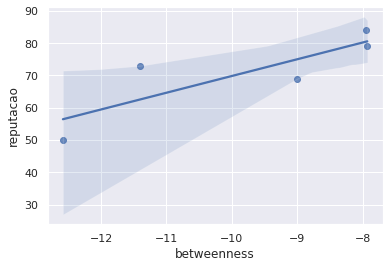

In [68]:
sns.regplot(x=np.log(df_positivos['betweenness']), y=df_positivos['reputacao'])

In [69]:
model = smf.ols(data=df_positivos, formula='reputacao ~ np.log(betweenness)')
result = model.fit()
result.summary()

/usr/local/lib/python3.7/site-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              reputacao   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     7.149
Date:                Tue, 16 Nov 2021   Prob (F-statistic):             0.0755
Time:                        15:56:14   Log-Likelihood:                -16.337
No. Observations:                   5   AIC:                             36.67
Df Residuals:                       3   BIC:                             35.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             121.7918     19.347      6.295      0.008      60.220     183.364
np.log(betweenness)     5.1957      1.943      2.674      0.075      -0.989      11.380
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.982
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.521
Skew:                           0.545   Prob(JB):                        0.771
Kurtosis:                       1.854   Cond. No.                         53.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""